# Statistical tests

This presentation will briefly go over MANOVAs (and also a bit of ANOVAs to make sense of MANOVAs). 

I have deliberately put in no equations!

## Basic theory stuff about ANOVAs and MANOVAs

## Hypothesis testing

Hypothesis testing is a method of statistical inference used to determine possbile probabilities of conflicting hypotheses (usually null and alternative hypothesis). 

Depending on our data and hypothesis we can use a variety of different tests to calculate the probalitiy of our hypothesis.

Broadly two categories of test exist:
- Parametric (which makes assumptions regarding the distriubtion of our data)
- Non Parametric (which makes less assumptions)

## Parametric tests T-tests and ANOVAs.

T-tests, ANOVAs and by extension MANOVAs are common hypothesis driven parametric statistical tests.  

T-tests and ANOVAs test if two or more means are sampled from the same distribution (i.e the null distribution). The null hypothesis for t-tests and ANOVAs is that the means are sampled from the same distriubtion.

ANOVAs are concerned with analysing the variance bewtween and within groups.

We won't really dwell on t-tests apart from to say that t-tests come in different flavours.


## How do ANOVAs work?

ANOVAs are a type of linear regression that uses an F test to then test for significance (basically it runs a regression then uses another test to calculate p values etc).

ANOVAs work by running a regression. From the regression an ANOVA then calculates the estimates of variance (called mean squares). An ANOVA calculates the total variance, the within group variance and the between group variance. 

Once an ANOVA has all that it can then caculate an F statistic, p values degrees of freedom and effect sizes. 

## ANOVA example

We have three groups, a actuely underweight group of individuals with Anorexia Nervosa, a weight-restored group and healthy controls and we want to examine the effect of group on ede-q scores.

The null hypothesis is that ede-q scores will not differ by group (all are sampled from the same null distribution) while the alternative hypothesis is that ede-q scores will differ by group (sampled from different distributions).

We can then run a one-way ANOVA with group as a catergorical independent variable and ede-q as a continious dependent variable to see if a group difference exists. 

## MANOVA

MANOVA is basically the same as an ANOVA but with one key difference. Instead of having one dependent variable a MANOVA can have two or more. 

So in our example on the previous slide if we wanted to check if ede-q scores AND AQ10 scores differed by group we would use a MANOVA rather than an ANOVA (we could also do two ANOVAs).

Mathematically MANOVAs work by testing a **vector** of two or more means are sampled from the same distribution. The null hypothesis is that the vector of means will be sampled from the same distriubtion, the alternative hypothesis is that the vector of means are taken from different multivariate distriubtions.

## When to use a MANOVA

Why use a MANOVA when we could just do multiple ANOVAs?

MANOVAs are useful:

**1) To explore how independent variables influence some patten of response in the dependent variables.**

2) When there are several correlated variables and a need for an overall statistical test with one value instead of performing multiple tests.

3) Used when assumptions of sphericity is violated (how equal the variance is, more equal variance = Sphericity)

## How MANOVAs work.

They work pretty much exactly the same as ANOVAs when running the regression and calculating variance. The difference is all the maths is now in matrix form.

The real difference between MANOVAs and ANOVAs is MANOVAs don't have one defintive test to calculate the significance and F statistics but rather a few. 

1) Pillai's trace (Conisdered the most powerful and robust). 

2) Hotelling-Lawley's trace.

3) Wilk's lambda (the first statistic to be used in multivariate analysis).

4) Roy's largest root (Often considered the weakest).

## An example of a MANOVA in python from (pretty much) start to finish

In this example we have three therapy methods and have collected two measures, one of client satisfacion and one test scores for a wellbeing questionnaire. 

We want to examine the realtionship between therapy methods and our two measures as well as seeing if there is a difference between therapy method and our two measures

In [1]:
#Code to read in the data
import pandas as pd 

#Code to do the manova
import statsmodels.multivariate.manova as manova 

#Code to plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [2]:
df = pd.read_csv('MANOVA_example.csv')

In [3]:
groups = df.groupby('Method')
groupa = groups.get_group(1)
groupb = groups.get_group(2)
groupc = groups.get_group(3)
des = pd.concat([groupa[['Test','Satisfaction']].describe().T, groupb[['Test','Satisfaction']].describe().T, groupc[['Test','Satisfaction']].describe().T], 
                 keys=['Method 1', 'Method 2', 'Method 3'])

In [4]:
print(df.head(),'\n')
print(df.dtypes, '\n')
print('Number of null values:', sum(df.isnull().sum()))

   Method   Test  Satisfaction
0       1  3.000         3.001
1       1  2.990         2.994
2       1  3.041         3.032
3       1  3.063         3.059
4       1  3.035         3.026 

Method            int64
Test            float64
Satisfaction    float64
dtype: object 

Number of null values: 0


In [5]:
print(des)

                       count      mean       std    min      25%     50%  \
Method 1 Test           16.0  3.019313  0.018973  2.990  3.00675  3.0165   
         Satisfaction   16.0  3.015125  0.016661  2.994  3.00300  3.0105   
Method 2 Test           16.0  3.020438  0.015891  2.997  3.00975  3.0150   
         Satisfaction   16.0  3.013313  0.016600  2.993  3.00275  3.0065   
Method 3 Test           16.0  3.027813  0.010540  3.007  3.02250  3.0270   
         Satisfaction   16.0  3.013125  0.013266  2.985  3.00425  3.0135   

                           75%    max  
Method 1 Test          3.03275  3.063  
         Satisfaction  3.02525  3.059  
Method 2 Test          3.03375  3.050  
         Satisfaction  3.02400  3.045  
Method 3 Test          3.03225  3.048  
         Satisfaction  3.02050  3.036  


<AxesSubplot:xlabel='Method', ylabel='Test'>

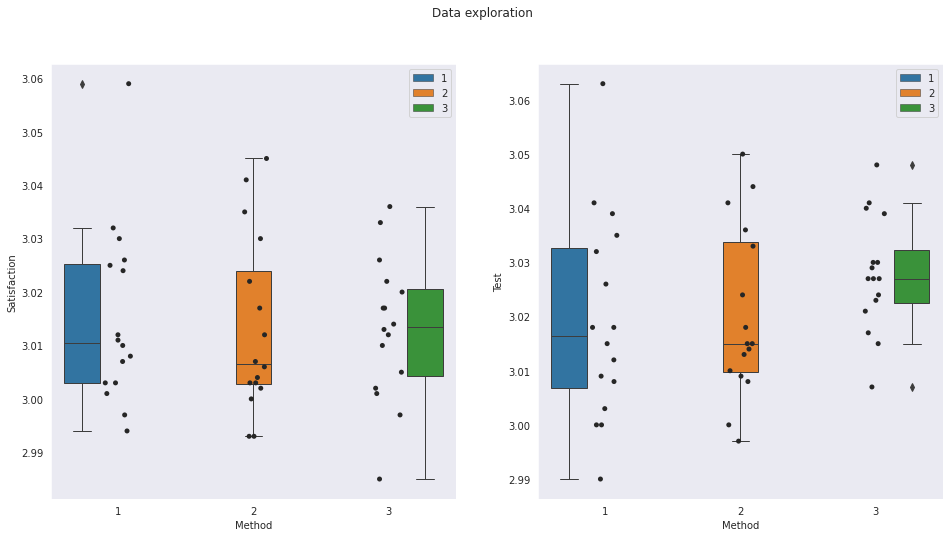

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
fig.suptitle('Data exploration')

sns.boxplot(ax=ax[0], data=df, x='Method', y='Satisfaction', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[0], data=df, x='Method', y='Satisfaction', color=".15")

sns.boxplot(ax=ax[1], data=df, x='Method', y='Test', hue=df['Method'].tolist(), linewidth=1)
sns.stripplot(ax=ax[1], data=df, x='Method', y='Test', color=".15")

<AxesSubplot:xlabel='Satisfaction', ylabel='Test'>

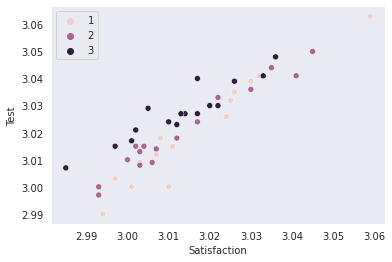

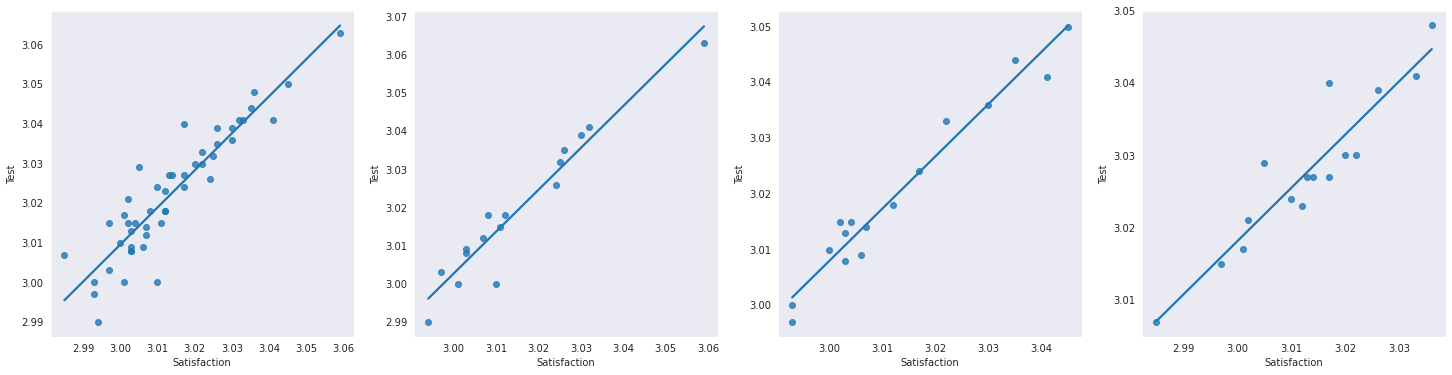

In [7]:
sns.scatterplot(data=df, x='Satisfaction', y='Test', hue=df['Method'].tolist())
fig, ax = plt.subplots(1,4, figsize=(25,6))
sns.regplot(ax=ax[0], data=df, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[1], data=groupa, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[2], data=groupb, x='Satisfaction', y='Test', ci=False)
sns.regplot(ax=ax[3], data=groupc, x='Satisfaction', y='Test', ci=False)

In [8]:
from scipy.stats import pearsonr

rval_groupa, pval_group_a = pearsonr(groupa['Test'], groupa['Satisfaction'])
rval_groupb, pval_group_b = pearsonr(groupb['Test'], groupb['Satisfaction'])
rval_groupc, pval_group_c = pearsonr(groupc['Test'], groupc['Satisfaction'])

print(f'Therapy group one, Test and Satisfaction correlation: pval {pval_group_a}, r2 {rval_groupa}')
print(f'Therapy group one, Test and Satisfaction correlation: pval {pval_group_b}, r2 {rval_groupb}')
print(f'Therapy group one, Test and Satisfaction correlation: pval {pval_group_c}, r2 {rval_groupc}')

Therapy group one, Test and Satisfaction correlation: pval 1.9445886001103883e-09, r2 0.9639072645781208
Therapy group one, Test and Satisfaction correlation: pval 4.573133994198773e-11, r2 0.9789973275306019
Therapy group one, Test and Satisfaction correlation: pval 1.6835858506784833e-07, r2 0.9308663337233278


In [9]:
fit = manova.MANOVA.from_formula('Test + Satisfaction ~ Method', data=df)
fitted_model = fit.mv_test()
print(fitted_model)

                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF   F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda    0.0002 2.0000 45.0000 131226.2913 0.0000
         Pillai's trace    0.9998 2.0000 45.0000 131226.2913 0.0000
 Hotelling-Lawley trace 5832.2796 2.0000 45.0000 131226.2913 0.0000
    Roy's greatest root 5832.2796 2.0000 45.0000 131226.2913 0.0000
-------------------------------------------------------------------
                                                                   
--------------------------------------------------------------------
            Method          Value   Num DF   Den DF  F Value  Pr > F
--------------------------------------------------------------------
             Wilks' lambda  0.5423  2.0000  45.0000  18.9867  0.00

## For fun?? lets test out the ANOVA

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print('ANOVA TABLE for Wellbeing test and Therapy method\n', 
       sm.stats.anova_lm(ols('Method ~ Test', data=df).fit(), typ=1))

print('\nANOVA TABLE for client Satisfaction and Therapy method\n', 
        sm.stats.anova_lm(ols('Method ~ Satisfaction', data=df).fit(), typ=1))

ANOVA TABLE for Wellbeing test and Therapy method
             df     sum_sq   mean_sq        F    PR(>F)
Test       1.0   1.603332  1.603332  2.42636  0.126164
Residual  46.0  30.396668  0.660797      NaN       NaN

ANOVA TABLE for client Satisfaction and Therapy method
                 df     sum_sq   mean_sq         F   PR(>F)
Satisfaction   1.0   0.093295  0.093295  0.134503  0.71549
Residual      46.0  31.906705  0.693624       NaN      NaN


In [13]:
print(ols('Method ~ Test', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 Method   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.426
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.126
Time:                        17:20:12   Log-Likelihood:                -57.144
No. Observations:                  48   AIC:                             118.3
Df Residuals:                      46   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.6331     22.876     -1.470      0.1